In [1]:
#Zachary Bédard
#261113611

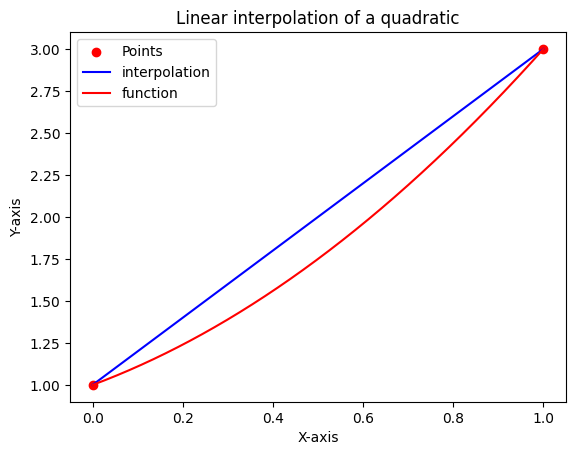

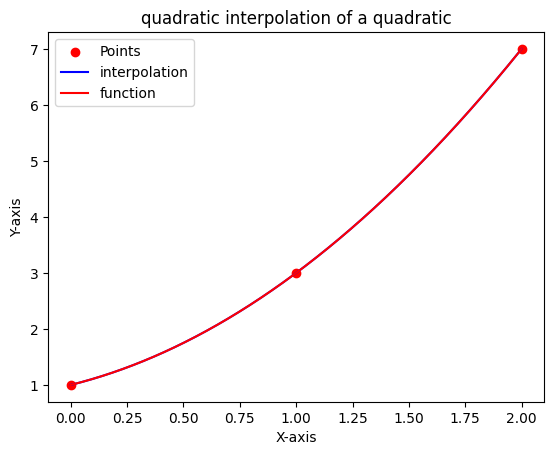

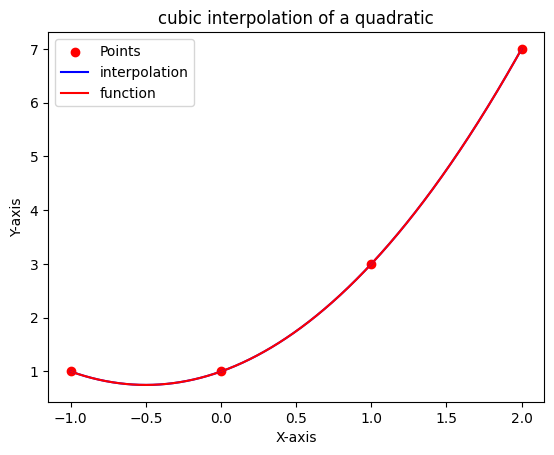

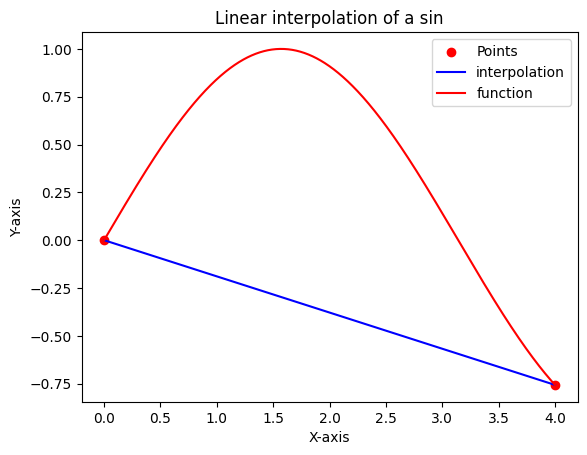

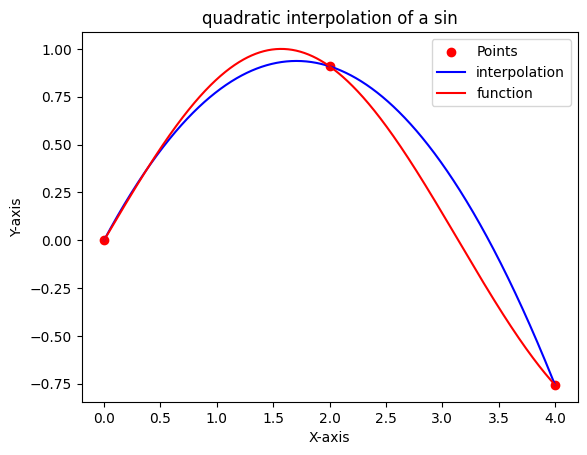

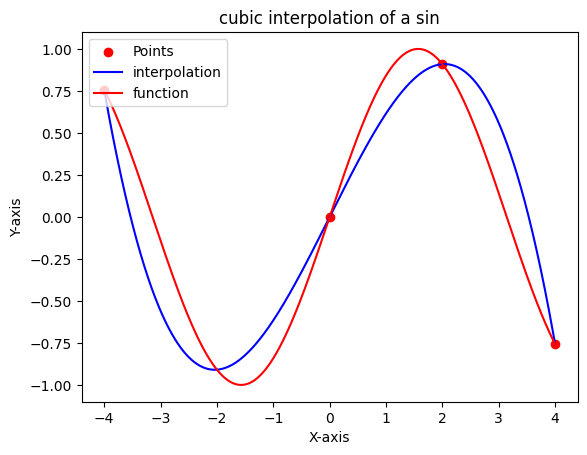

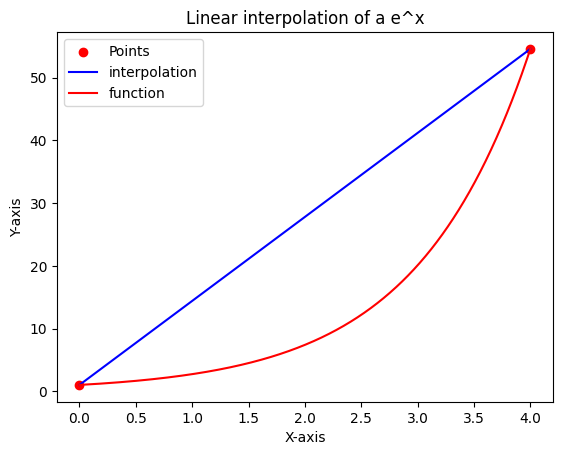

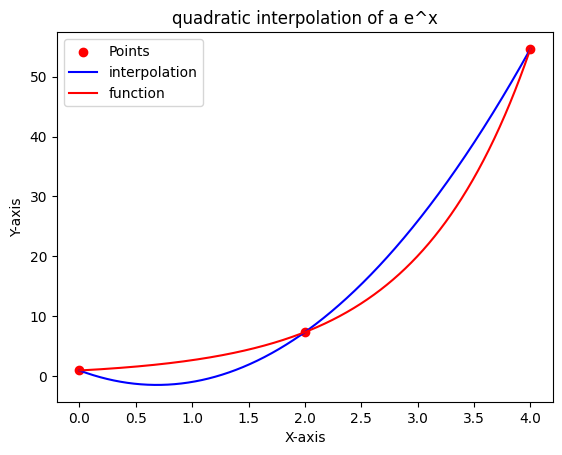

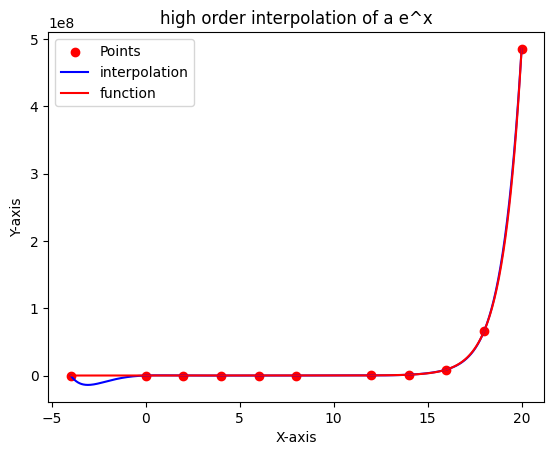

In [17]:
"""1. Implement Lagrange interpolation. Note that your code will not consist of a single
function to compute Lnf (x), because you need to preprocess the data f, x0, . . . , xn, so
that the computation of Lnf (x) would bene t from the result. Showcase your code by
several interesting examples, by plotting the graphs of f and Lnf
"""

# NOTE : I reuse some code in the cell at the bottom, so they wont run if the cell's at the top
# have not been runned first.

# There seems to be many approach to this problem. 

# We can of course easily make a single function that will compute
# the lagrange approximation at a certain point x. However, this require to re-compute 
# the coefficients each time, this is very unefficient.

# My first approach was to design a builder function, what would build a function 
# representing the interpolation and return it. However, this seems to require 
# functionnal programming skills that I haven't yet learned.

# Therefore, I take an object-oriented approach, the lagrange interpolation of a function will be 
# an object that we build then use.

import matplotlib.pyplot as plt
import numpy as np
import math

# this class represent a Lagrange coefficien, we store all of the x_0, ... x_n and it's divisor
# it has a function compute_coefficient(x) that compute the value of this coefficient for x.
class Lagrange_coefficient:

    def __init__(self, ls_of_x, divisor):
        self.ls_of_x = ls_of_x
        self.divisor = divisor

    def compute_coefficient(self,x):
        result = 1

        for x_n in self.ls_of_x:
            result = result * (x - x_n)

        return result / self.divisor

# this class represent a Lagrange interpolation of a function
# when instatiating the class, we provide the nodes necessary to build the 
# interpolating function. 

# it has a funcion. lagrange_interpolation_function(x) that compute its value 
# for a certain x.
class Lagrange_interpolation:

    def __init__(self, ls_of_nodes):

        # we need to build a function f(x) = y_0 * coeff_0(x) + y_1 * coeff_1(x) + ... + y_n * coeff_n(x)
        # where each coeff_i(x) is (x - x_0)...(x-x_(i-1))(x-(x_(i+1))...(x-x_n)/(x_i-x_0)...(x_i-x_n)

        # we will store all of the coefficients when creating a new lagrange interpolation for a function
        # then compute a specific approximation for x using those coefficients.

        self.ls_of_coefficients = []
        self.ls_of_y = []

        self.n = len(ls_of_nodes)  # degree

        for node1 in ls_of_nodes:

            ls_of_x_in_coeff = []
            divisor = 1

            for node2 in ls_of_nodes:
                if node1 != node2:
                    ls_of_x_in_coeff.append(node2[0])
                    divisor = divisor * (node1[0] - node2[0])

            self.ls_of_coefficients.append(Lagrange_coefficient(ls_of_x_in_coeff, divisor))
            self.ls_of_y.append(node1[1])

    def lagrange_interpolation_function(self,x):

        result = 0

        for i in range(len(self.ls_of_coefficients)):
            result += self.ls_of_y[i] * self.ls_of_coefficients[i].compute_coefficient(x)

        return result

# module to plot points & function
def plotpoints (x_values, f, my_title):


    y_values = []
    x_y_points = []

    for i in range(len(points)) :
    
        y_values.append(f(x_values[i]))
        x_y_points.append([x_values[i], f(x_values[i])])
    
    plt.scatter(x_values, y_values, color='red', marker='o', label='Points')
    
    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    
    myInterp = Lagrange_interpolation(x_y_points)

    x_space = np.linspace(x_values[0], x_values[-1], 1000)
    

    y_space = myInterp.lagrange_interpolation_function(x_space)
    y_space_f = f(x_space)

    
    plt.plot(x_space, y_space, label="interpolation", color='blue')
    plt.plot(x_space, y_space_f, label="function", color='red')
    

    plt.title(my_title)

    plt.legend()
    

    plt.show()
    
def f(x) :
    return x**2 + x + 1


# several interesting examples.
points = [0,1]

plotpoints(points, f, "Linear interpolation of a quadratic")


points = [0,1,2]

plotpoints(points, f, "quadratic interpolation of a quadratic")


points = [-1,0,1,2]

plotpoints(points, f, "cubic interpolation of a quadratic")

points = [0,4]

plotpoints(points, np.sin, "Linear interpolation of a sin")


points = [0,2,4]

plotpoints(points, np.sin, "quadratic interpolation of a sin")


points = [-4,0,2,4]

plotpoints(points, np.sin, "cubic interpolation of a sin")


points = [0,4]

plotpoints(points, np.exp, "Linear interpolation of a e^x")


points = [0,2,4]

plotpoints(points, np.exp, "quadratic interpolation of a e^x")


points = [-4,0,2,4, 6, 8, 12, 14, 16, 18, 20]

plotpoints(points, np.exp, "high order interpolation of a e^x")




            
            

In [18]:
"""2.
Write a code to compute the maximum error of Lnf in the interval [a, b]. This does not
need to be very precise. For example, you could evaluate f and Lnf at 1000 equally
spaced points in [a, b], to approximate the maximum error. Test it on a couple of well
chosen examples.
"""

def max_error1(f, x_values, interpolation=None, ln=False): 
    # note : we can use that directly with a pre-made interpolation by providing an interpolation and (a,b) instead of x_values
    # or with a bunch of x_values and a function to test.
    # the flag ln tells if we want to return the error or ln(error)
    
    if interpolation == None : 
    
        y_values = []
        x_y_values = []
        for x in x_values : 
    
            y = f(x)
            
            y_values.append(y)
            x_y_values.append([x,y])
    
        myInterp = Lagrange_interpolation(x_y_values)
        
    else : 
        myInterp = interpolation

    my_max_error = 0
    
    a = x_values[0]
    b = x_values[-1]
    space_between_points = (b - a)/1000
    
    x_n = a 


    while (x_n <= b) :


        current_error = abs(myInterp.lagrange_interpolation_function(x_n) - f(x_n))

        x_n += space_between_points
        
        if current_error > my_max_error :
            my_max_error = current_error
    if (ln) :
        return math.log(my_max_error)
        
    return my_max_error




print("maximal error of linear interpolation of quadratic between 0 and 2: " +  str(max_error1(f, [0,1,2])))
print("maximal error of quadratic interpolation of quadratic between 0 and 1: " +  str(max_error1(f, [0,1])))

print("maximal error of linear interpolation of sin between 0 and 4: " +  str(max_error1(math.sin, [0,4])))
print("maximal error of linear interpolation of sin between 0 and 4: " +  str(max_error1(math.sin, [0,2,4])))
print("maximal error of cubic interpolation of sin between 0 and 4: " +  str(max_error1(math.sin, [0,1,3,4])))

print("maximal error of linear interpolation of e^x between 0 and 4: " +  str(max_error1(np.exp, [0,4])))
print("maximal error of linear interpolation of e^x between 0 and 4: " +  str(max_error1(np.exp, [0,2,4])))
print("maximal error of cubic interpolation of e^x between 0 and 4: " +  str(max_error1(np.exp, [0,1,3,4])))


maximal error of linear interpolation of quadratic between 0 and 2: 8.881784197001252e-16
maximal error of quadratic interpolation of quadratic between 0 and 1: 0.24999999999999978
maximal error of linear interpolation of sin between 0 and 4: 1.315147415073107
maximal error of linear interpolation of sin between 0 and 4: 0.27798321620048105
maximal error of cubic interpolation of sin between 0 and 4: 0.12833210148288032
maximal error of linear interpolation of e^x between 0 and 4: 22.375208722214353
maximal error of linear interpolation of e^x between 0 and 4: 6.325024141850378
maximal error of cubic interpolation of e^x between 0 and 4: 1.4635814522540302


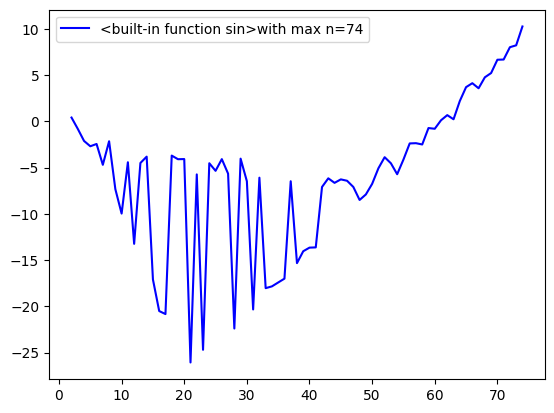

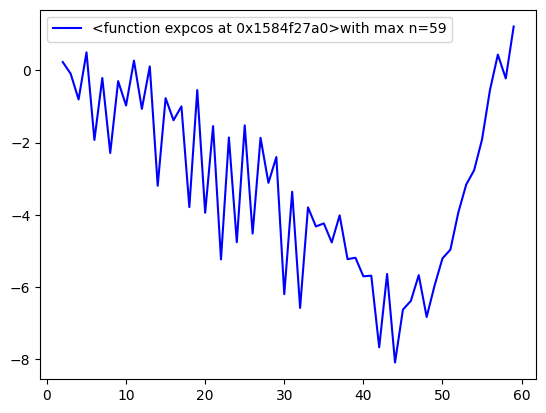

as we can see, up to a point, increasing n improve the interpolation. However, as n gets beyond a certain point, maximal error
start increasing very rapidly (expodentially)


In [19]:
"""3.Choose some \nice" function f , such as sin x or exp(cos x), and apply Lagrange inter-
polation with equally spaced nodes in the interval [a, b]. The endpoints of the interval
should be included in the nodes, that is, we have x0 = a and xn = b. Plot the graph of
the logarithm of the maximum error against the polynomial degree n. Comment on the
result."""


# note : since I compute for big n's this one is a bit slow, it could take a few
# secounts for my result to appear.

def euqally_spaced_intertpolation(f,a,b, n) :

    # n = 0 -> [a,b]
    # n = 1 -> space_between_nodes = (b-a)/2
    # n = 2

    space_between_nodes = abs((b-a)/(n+1))


    x_y_values = []

    x_n = a

 
    while x_n < b :

        
        x_y_values.append([x_n, f(x_n)])
        x_n += space_between_nodes

    
    if x_y_values[-1][0] != b :
        x_y_values.append([b, f(b)])   

    myInterp = Lagrange_interpolation(x_y_values)

    return myInterp

def question3(f,max_n, a,b):

    n_values = []
    max_error_values = []



    for n in range(2,max_n):


        myInterp = euqally_spaced_intertpolation(f,a,b,n)

        maxerr = max_error1(f, [a,b], myInterp)

        n_values.append(n)
        max_error_values.append(math.log(maxerr))
        

    plt.plot(n_values, max_error_values, label=(str(f) +"with max n="+ str(n)), color='blue')

    plt.legend()

    plt.show()

def expcos(x): # y = e^cos(x)

    return math.exp(math.cos(x))



question3(math.sin, 75, -4, 4)
question3(expcos, 60, -4, 4)

print ("as we can see, up to a point, increasing n improve the interpolation. However, as n gets beyond a certain point, maximal error")
print ("start increasing very rapidly (expodentially)")


    
    


3
8
28


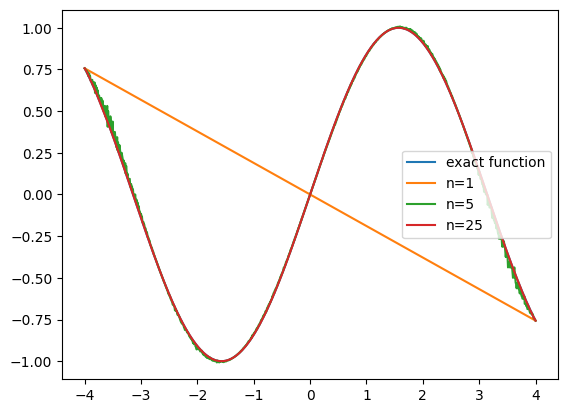

we can see that increasing the n improve the interpolation
62


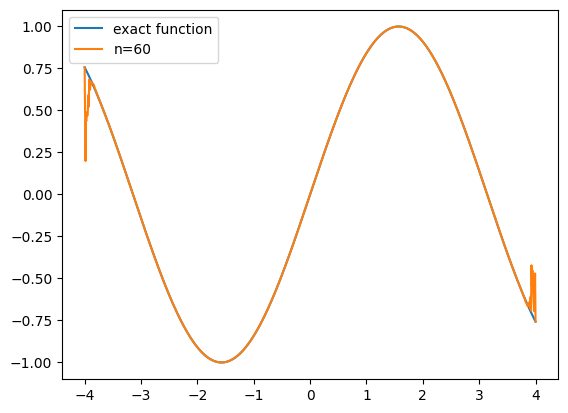

However, past a certain point, around 60, the Runge phenomenon starts make the edges oscillates, wich cause more error 
66


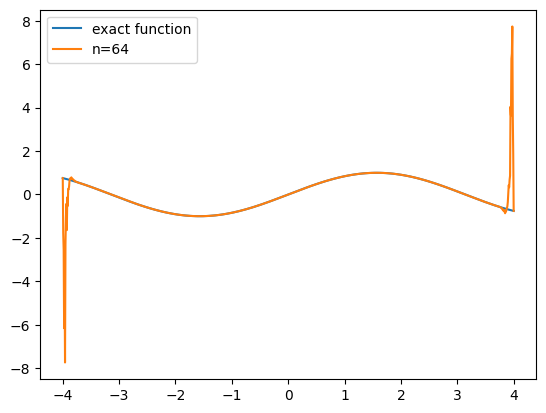

as we can see, the error grows very rapidly past 60


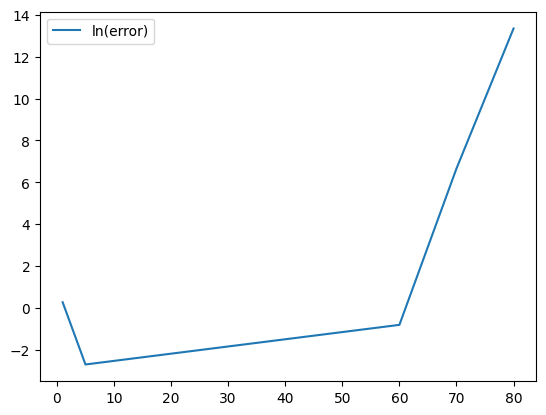

In [20]:
"""4. It is well known that Lagrange interpolation with equally spaced nodes is susceptible
to the Runge phenomenon. You are asked to do some reading to familiarize yourself
with this phenomenon. Pick a function f , and illustrate the Runge phenomenon by the
graphs of Lnf . As in the previous question, plot also the graph of the logarithm of the
maximum error against the polynomial degree n. Comment on the result."""

def draw_graph(f, a, b, label) : 

    x_space = (np.linspace(a, b, 1000)).tolist()
    
    y_space = []
    for x in x_space :
        
        y_space.append( f(x))

    plt.plot(x_space, y_space, label=label)
    plt.legend()

# we will plot sin(x) in the interval [-4,4]

a = -4
b = 4

my_fun = np.sin

draw_graph(my_fun, a, b, "exact function")

for n in [1,5,25] :

    #my_interp =  Lagrange_interpolation([[-4, math.sin(-4)],[0, math.sin(0)], [4, math.sin(4)]])  
    my_interp = euqally_spaced_intertpolation(my_fun,a,b, n)

    draw_graph(my_interp.lagrange_interpolation_function, a, b,("n=" + str(n)))

    print(len(my_interp.ls_of_coefficients))

plt.show()

print("we can see that increasing the n improve the interpolation")






draw_graph(my_fun, a, b, "exact function")
n = 60

my_interp = euqally_spaced_intertpolation(my_fun,a,b, n)

draw_graph(my_interp.lagrange_interpolation_function, a, b,("n=" + str(n)))

print(len(my_interp.ls_of_coefficients))

plt.show()

print("However, past a certain point, around 60, the Runge phenomenon starts make the edges oscillates, wich cause more error ")




draw_graph(my_fun, a, b, "exact function")
n = 64
my_interp = euqally_spaced_intertpolation(my_fun,a,b, n)

draw_graph(my_interp.lagrange_interpolation_function, a, b,("n=" + str(n)))

print(len(my_interp.ls_of_coefficients))

plt.show()
    
# errors : 


maxerrorss = []


for n in [1,5,60, 70, 80] :
    my_interp = euqally_spaced_intertpolation(my_fun,a,b, n)

    maxerrorss.append(max_error1(my_fun, [a,b], my_interp, True))

plt.plot([1,5,60, 70, 80], maxerrorss, label="ln(error)")

print("as we can see, the error grows very rapidly past 60")
plt.legend()
   

plt.show()









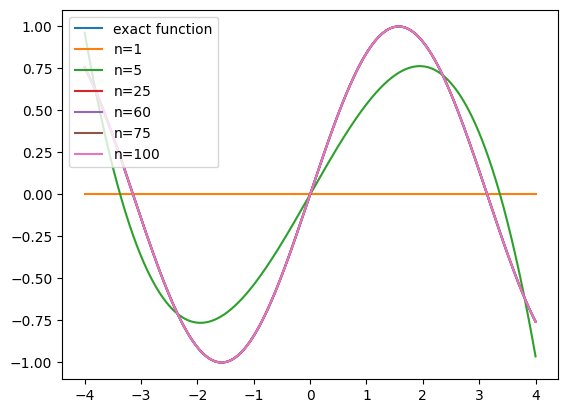

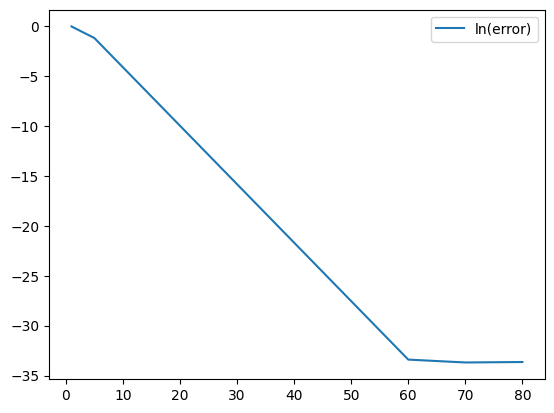

A we can see, using chebyshev nodes makes the runge phenomenon go away !
As n increase, the interpolation get better and better (lines are all over each other and we
Dont even see that they are distinct, even on the edges !


In [21]:
"""5. Now perform Lagrange interpolation with Chebyshev nodes on the same example, in
order to see how Chebyshev nodes compare to equally spaced nodes. Plot the graphs
of Lnf , and also plot the graph of the logarithm of the maximum error against the
polynomial degree n. Comment on the result."""


def chebyshev(n, a ,b) : 

    chebyshev_nodes = []

    for i in range(1, n+1) : 

        root = (math.cos((((2 * i)-1) * math.pi)/(2 * n)))
        chebyshev_nodes.append(0.5 * (a +b) + 0.5 * (b-a) * root)
                               
    return chebyshev_nodes


def chebyshev_nodes_interpolation(f, n, a, b) :

    x_values = chebyshev(n, a, b)
    x_y_values = []

    for x in x_values :

        x_y_values.append([x, f(x)])
        
    myInterp = Lagrange_interpolation(x_y_values)

    return myInterp

a = -4
b = 4

my_fun = np.sin

draw_graph(my_fun, a, b, "exact function")

for n in [1,5,25, 60, 75, 100] :

    #my_interp =  Lagrange_interpolation([[-4, math.sin(-4)],[0, math.sin(0)], [4, math.sin(4)]])  
    my_interp = chebyshev_nodes_interpolation(my_fun, n, a, b)

    draw_graph(my_interp.lagrange_interpolation_function, a, b,("n=" + str(n)))



plt.show()



maxerrorss = []


for n in [1,5,60, 70, 80] :
    my_interp = chebyshev_nodes_interpolation(my_fun,n,a, b)

    maxerrorss.append(max_error1(my_fun, [a,b], my_interp, True))

plt.plot([1,5,60, 70, 80], maxerrorss, label="ln(error)")

plt.legend()
   

plt.show()




print("A we can see, using chebyshev nodes makes the runge phenomenon go away !")
print("As n increase, the interpolation get better and better (lines are all over each other and we")
print("Dont even see that they are distinct, even on the edges !")


    



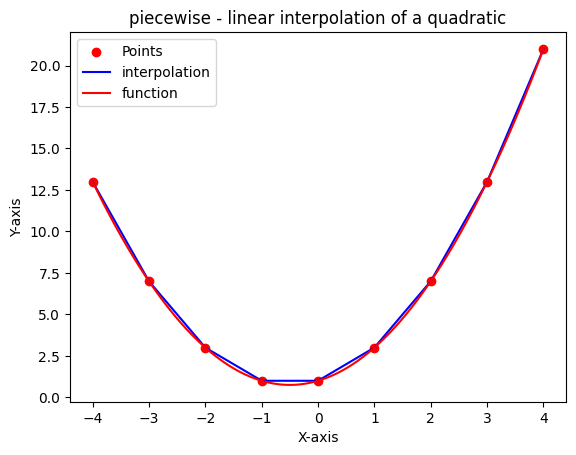

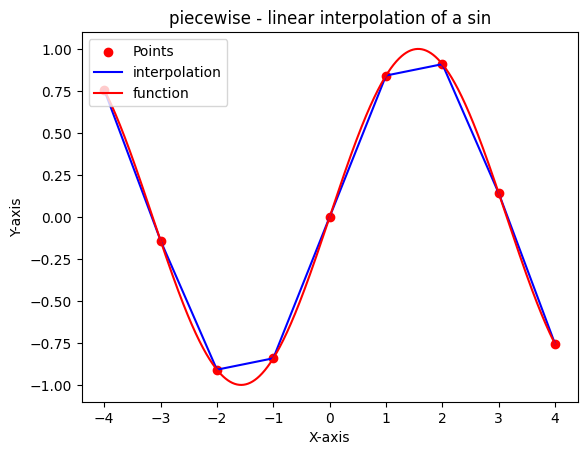

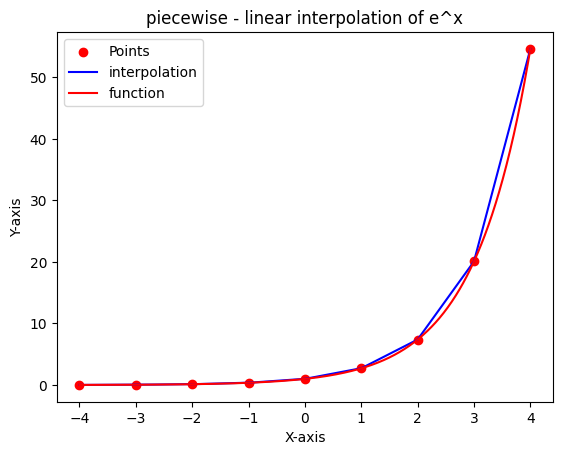

In [22]:
"""6. Implement piecewise linear interpolation with equally spaced nodes in [a, b]. Showcase
your code by several interesting examples"""

class Linear_interpolation :

    def __init__(self,node1,node2):

        self.x0 = node1[0]
        self.y0 = node1[1]
        self.x1 = node2[0]
        self.y1 = node2[1]

        
    def rule(self,x) :

    

        return self.y0 * (x-self.x1)/(self.x0 - self.x1) + self.y1 * (x - self.x0)/(self.x1 - self.x0)
    
        
    def is_in_range(self,x) :

       
        
        return (self.x0 <= x) and (x <= self.x1) 




class Piecewise_linear_interpolation :


    def __init__(self, nodes):

        self.set_of_linar_interpolation = []
        for i in range(len(nodes)-1) :
            linear_interpolation = Linear_interpolation(nodes[i], nodes[i+1])
            self.set_of_linar_interpolation.append(linear_interpolation)
            
    def piecewise_linear(self,x) :
        
        for interpolation in self.set_of_linar_interpolation :
            if interpolation.is_in_range(x) :

                return interpolation.rule(x)

        
        


                


def plotpoints2 (x_values, f, my_title):


    y_values = []
    x_y_points = []

    for i in range(len(points)) :
    
        y_values.append(f(x_values[i]))
        x_y_points.append([x_values[i], f(x_values[i])])

    
    plt.scatter(x_values, y_values, color='red', marker='o', label='Points')
    
    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    
    myInterp = Piecewise_linear_interpolation(x_y_points)
    
        
    
    x_space = np.linspace(x_values[0], x_values[-1], 1000)
    
    # Step 3: Compute the corresponding y-values using the function
    y_space = []
    y_space_f = []

    
    for x in x_space :
        y_space.append( myInterp.piecewise_linear(x))
        y_space_f.append(f(x))
        
    #print(y_space)
    #print(x_values)
    
    plt.plot(x_space, y_space, label="interpolation", color='blue')
    plt.plot(x_space, y_space_f, label="function", color='red')
    
    # Adding labels and title    
    
    plt.title(my_title)
    # Adding a legend
    plt.legend()
    
    # Display the plot
    plt.show()
        

# several interesting examples.

def f(x) :
    return x**2 + x + 1

def sin(x) :
    return np.sin(x)

points = [-4,-3,-2,-1,0,1,2,3,4]

plotpoints2(points, f, "piecewise - linear interpolation of a quadratic")


points = [-4,-3,-2,-1,0,1,2,3,4]

plotpoints2(points, math.sin, "piecewise - linear interpolation of a sin")

points = [-4,-3,-2,-1,0,1,2,3,4]

plotpoints2(points, np.exp, "piecewise - linear interpolation of e^x")



        

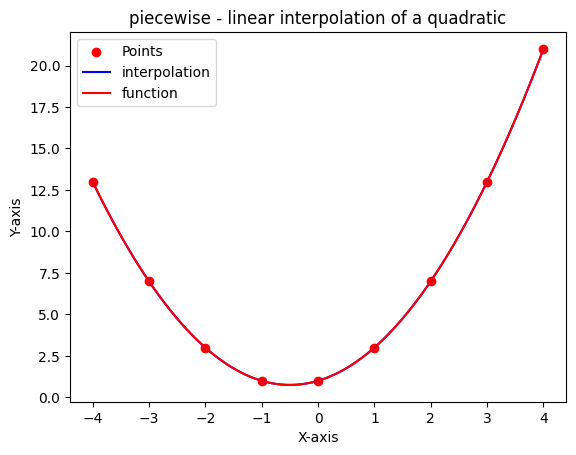

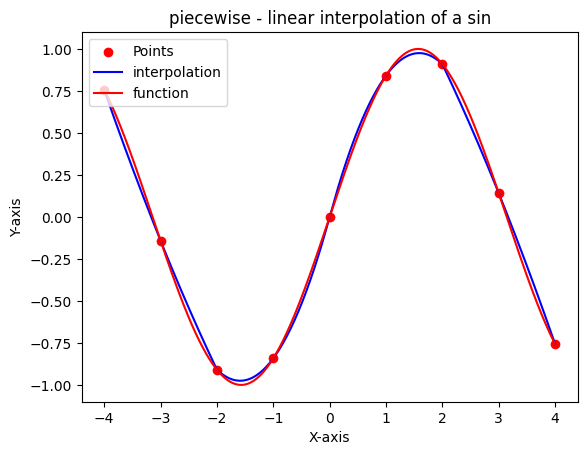

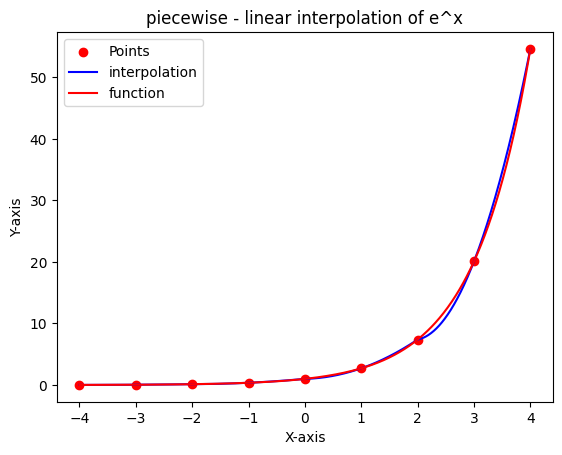

In [23]:
"""7. Implement piecewise quadratic interpolation with equally spaced nodes in [a, b]. Show-
case your code by several interesting examples.
"""

class Quadratic_interpolation :

    def __init__(self,node1,node2,node3):

        self.x0 = node1[0]
        self.y0 = node1[1]
        
        self.x1 = node2[0]
        self.y1 = node2[1]

        self.x2 = node3[0]
        self.y2 = node3[1]
                
    def rule(self,x) : # we use lagrange quadratic interpolation.

        term0 = ((x-self.x1) * (x - self.x2)) / ((self.x0 -self.x1)*(self.x0 - self.x2))
        term1 = ((x-self.x0) * (x - self.x2)) / ((self.x1 -self.x0)*(self.x1 - self.x2))
        term2 = ((x-self.x0) * (x - self.x1)) / ((self.x2 -self.x0)*(self.x2 - self.x1))

        return self.y0 * term0 + self.y1 * term1 + self.y2 * term2

        return self.y0 * (x-self.x1)/(self.x0 - self.x1) + self.y1 * (x - self.x0)/(self.x1 - self.x0)
    
        
    def is_in_range(self,x) :

       
        
        return (self.x0 <= x) and (x <= self.x2) 




class Piecewise_quadratic_interpolation :


    def __init__(self, nodes):

        self.set_of_quadratic_interpolation = []

        i = 0
        while i <len(nodes)-2 :
            quadratic_interpolation = Quadratic_interpolation(nodes[i], nodes[i+1], nodes[i+2])
            self.set_of_quadratic_interpolation.append(quadratic_interpolation)
            i = i +2
            
    def piecewise_quadratic(self,x) :
        
        for interpolation in self.set_of_quadratic_interpolation :

            if interpolation.is_in_range(x) :
                return interpolation.rule(x)
                
            


def plotpoints3 (x_values, f, my_title):


    y_values = []
    x_y_points = []

    for i in range(len(points)) :
    
        y_values.append(f(x_values[i]))
        x_y_points.append([x_values[i], f(x_values[i])])

    
    plt.scatter(x_values, y_values, color='red', marker='o', label='Points')
    
    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    
    myInterp = Piecewise_quadratic_interpolation(x_y_points)
    
        
    
    x_space = np.linspace(x_values[0], x_values[-1], 1000)
    
    # Step 3: Compute the corresponding y-values using the function
    y_space = []
    y_space_f = []

    
    for x in x_space :
        y_space.append( myInterp.piecewise_quadratic(x))
        y_space_f.append(f(x))
        
    #print(y_space)
    #print(x_values)
    
    plt.plot(x_space, y_space, label="interpolation", color='blue')
    plt.plot(x_space, y_space_f, label="function", color='red')
    
    # Adding labels and title    
    
    plt.title(my_title)
    # Adding a legend
    plt.legend()
    
    # Display the plot
    plt.show()
        



# several interesting examples.

def f(x) :
    return x**2 + x + 1

def sin(x) :
    return np.sin(x)

points = [-4,-3,-2,-1,0,1,2,3,4]

plotpoints3(points, f, "piecewise - linear interpolation of a quadratic")


points = [-4,-3,-2,-1,0,1,2,3,4]

plotpoints3(points, math.sin, "piecewise - linear interpolation of a sin")

points = [-4,-3,-2,-1,0,1,2,3,4]

plotpoints3(points, np.exp, "piecewise - linear interpolation of e^x")

        



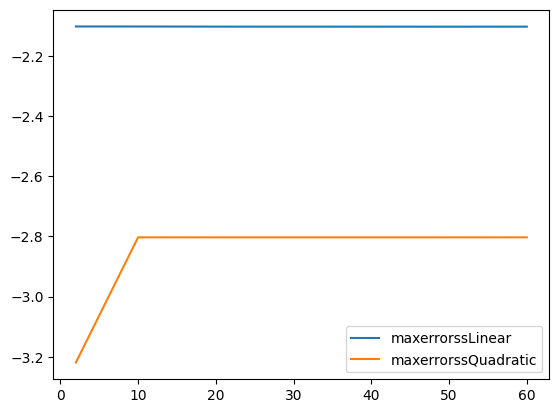

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [41]:
"""8. Take the function f from Question 3, and compare the errors of its piecewise linear and
piecewise quadratic interpolations. Do this by graphing the logarithm of the maximum
errors. Repeat the experiment for the function f from Question 4. Comment on the
result.
"""

def max_error5(f, x_values, interpolation=None, ln=False, type="l"): # type -> q = quadratic, l = lineard 
    # note : we can use that directly with a pre-made interpolation by providing an interpolation and (a,b) instead of x_values
    # or with a bunch of x_values and a function to test.
    # the flag ln tells if we want to return the error or ln(error)
    
    if interpolation == None : 
    
        y_values = []
        x_y_values = []
        for x in x_values : 
    
            y = f(x)
            
            y_values.append(y)
            x_y_values.append([x,y])
    
        myInterp = Lagrange_interpolation(x_y_values)
        
    else : 
        myInterp = interpolation

    my_max_error = 0
    
    a = x_values[0]
    b = x_values[-1]
    space_between_points = (b - a)/1000
    
    x_n = a 


    while (x_n <= b) :

        if (type == "q"):

            if myInterp.piecewise_quadratic(x_n) == None :
                current_error = 0 #This resolve a bug that I have not been able to fix in time.

            else :
                current_error = abs(myInterp.piecewise_quadratic(x_n) - f(x_n))

        else : 
            

            current_error = abs(myInterp.piecewise_linear(x_n) - f(x_n))

        x_n += space_between_points
        
        if current_error > my_max_error :
            my_max_error = current_error
    if (ln) :
        return math.log(my_max_error)
        
    return my_max_error





my_f = math.sin
maxerrorssLinear = []
maxerrorssQuadratic = []

for n in [2,10,20,50, 60] :


    x_values = []
    y_values = []
    x_y_values = []

    for i in range(-n,n):
        x_values.append(i)
        y_values.append(my_f(i))
        x_y_values.append([i,my_f(i)])
                      
    

    myPieceWiseLinear = Piecewise_linear_interpolation(x_y_values)
    myPieceWsieQuadratic  = Piecewise_quadratic_interpolation(x_y_values)

    

    maxerrorssLinear.append(max_error5(my_f, [x_values[0],x_values[-1]], myPieceWiseLinear, True, "l"))
    maxerrorssQuadratic.append(max_error5(my_f, [x_values[0],x_values[-1]], myPieceWsieQuadratic, True, "q"))
                            
plt.plot([2,10,20,50, 60], maxerrorssLinear, label="maxerrorssLinear")
plt.plot([2,10,20,50, 60], maxerrorssQuadratic, label="maxerrorssQuadratic")
plt.legend()
plt.show()

print("This maximum error for a linear piecewise interpolation is stable for any n, however, it is higher thant ")
print("the maximum error for a quadratic piecewise interpolation, wich increase at the beginning, then stabilise")



